<a href="https://colab.research.google.com/github/hayrullahcanozkan/Python-/blob/main/Best%20%26%20Worst%20Days%20To%20Invest%20In%20The%20Bist%20100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [4]:
# create day list
Pazartesı=[]
Salı=[]
Çarşamba=[]
Perşembe=[]
Cuma=[]
Cumartesi=[]
Pazar=[]

In [21]:
#Create a functıon to get the daılıy sımple return for each
def get_dsr(day,dsr):
  if day=='Monday':
    Pazartesı.append(float(dsr))
  elif day =='Tuesday':
    Salı.append(float(dsr))
  elif day =='Wednesday':
    Çarşamba.append(float(dsr))
  elif day =='Thursday':
    Perşembe.append(float(dsr))
  elif day =='Friday':
    Cuma.append(float(dsr))
  elif day =='Saturday':
    Cumartesi.append(float(dsr))
  elif day =='Sunday':
    Pazar.append(float(dsr))
  

In [22]:
df=pd.read_csv('BIST100.csv')
df= df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-11-05,2021-11-05,1575.800049,1586.599976,1568.800049,1583.599976,1583.599976,3136853600
2021-11-08,2021-11-08,1589.400024,1609.099976,1589.199951,1608.500000,1608.500000,3176989900
2021-11-09,2021-11-09,1612.000000,1631.500000,1605.400024,1615.599976,1615.599976,4438372300
2021-11-10,2021-11-10,1618.099976,1627.199951,1603.800049,1624.099976,1624.099976,3398869700
2021-11-11,2021-11-11,1622.000000,1643.800049,1621.500000,1625.099976,1625.099976,4057827400
...,...,...,...,...,...,...,...
2022-10-31,2022-10-31,3884.600098,3982.300049,3880.899902,3979.000000,3979.000000,3727242300
2022-11-01,2022-11-01,3987.399902,4100.200195,3987.399902,4054.699951,4054.699951,4480582500
2022-11-02,2022-11-02,4059.199951,4098.600098,4040.100098,4071.899902,4071.899902,4348934400
2022-11-03,2022-11-03,4078.199951,4116.500000,4055.899902,4105.500000,4105.500000,3875210400


In [23]:
# Calculate and show the daily simple return 
DSR=df['Close'].pct_change(1)
df['DSR']=DSR
df=df[1:]
df

,Date,Open,High,Low,Close,Adj Close,Volume,DSR
2021-11-08,2021-11-08,1589.400024,1609.099976,1589.199951,1608.500000,1608.500000,3176989900,0.015724
2021-11-09,2021-11-09,1612.000000,1631.500000,1605.400024,1615.599976,1615.599976,4438372300,0.004414
2021-11-10,2021-11-10,1618.099976,1627.199951,1603.800049,1624.099976,1624.099976,3398869700,0.005261
2021-11-11,2021-11-11,1622.000000,1643.800049,1621.500000,1625.099976,1625.099976,4057827400,0.000616
2021-11-12,2021-11-12,1631.400024,1642.800049,1631.400024,1638.500000,1638.500000,2828953500,0.008246
...,...,...,...,...,...,...,...,...
2022-10-31,2022-10-31,3884.600098,3982.300049,3880.899902,3979.000000,3979.000000,3727242300,0.025780
2022-11-01,2022-11-01,3987.399902,4100.200195,3987.399902,4054.699951,4054.699951,4480582500,0.019025
2022-11-02,2022-11-02,4059.199951,4098.600098,4040.100098,4071.899902,4071.899902,4348934400,0.004242
2022-11-03,2022-11-03,4078.199951,4116.500000,4055.899902,4105.500000,4105.500000,3875210400,0.008252


In [24]:
# create a loop a gather the daıly sımple returns of each
for i in range (0,len(df)):
  df_date=str(df.index[i])
  df_dsr=df['DSR'][i]
  df_month=df_date.split('-')[1]
  curr_date=df.index[i]
  df_weekday= calendar.day_name[curr_date.weekday()]

  get_dsr(df_weekday,df_dsr)

In [25]:
#Create a functıon to avarage the returns of each weekday
def AVG(day):
  if not day :
    return[0]
  else:
    return[sum(day)/len(day)]
    

In [26]:
#create a new df and set the index best day
df_returns=pd.DataFrame(index=['Pazartesi','Salı','Çarşamba','Perşembe','Cuma','Cumartesi','Pazar'])
df_returns['AVG']=AVG(Pazartesı)+AVG(Salı)+AVG(Çarşamba)+AVG(Perşembe)+AVG(Cuma)+AVG(Cumartesi)+AVG(Pazar)


In [27]:
df_returns

,AVG
Pazartesi,0.010415
Salı,0.001064
Çarşamba,0.002098
Perşembe,0.002028
Cuma,0.003866
Cumartesi,0.000000
Pazar,0.000000


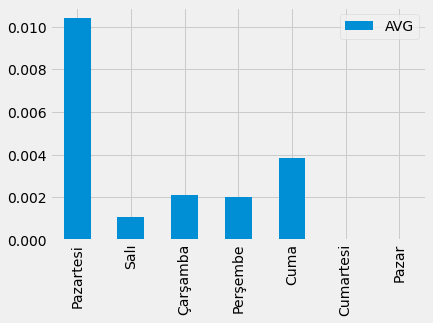

In [28]:
df_returns.plot.bar()